# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
   

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    # print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | cabinda
Processing Record 3 of Set 1 | hwange
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | armacao de buzios
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | bikenibeu village
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | anahuac
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | taranagar
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | 

Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | arenapolis
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | north shore
Processing Record 44 of Set 4 | rudsar
Processing Record 45 of Set 4 | roghun
Processing Record 46 of Set 4 | catio
Processing Record 47 of Set 4 | wanning
Processing Record 48 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 49 of Set 4 | vorgashor
Processing Record 0 of Set 5 | nuuk
Processing Record 1 of Set 5 | coahuayana de hidalgo
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | punta arenas
Processing Record 4 of Set 5 | luninyets
Processing Record 5 of Set 5 | sos'va
Processing Record 6 of Set 5 | choibalsan
Processing Record 7 of Set 5 | kailua-kona
Processing Record 8 of Set 5 | yaren
Processing Record 9 of Set 5 | clearwater
Processing Record 10 of Set 5 | ujae
Processing Record 11 of Set 5 | nova xavantina
Processing Record 

Processing Record 27 of Set 8 | dame-marie
Processing Record 28 of Set 8 | santana
Processing Record 29 of Set 8 | kachia
Processing Record 30 of Set 8 | camocim
Processing Record 31 of Set 8 | nuku'alofa
Processing Record 32 of Set 8 | keflavik
Processing Record 33 of Set 8 | gadzhiyevo
Processing Record 34 of Set 8 | yangor
City not found. Skipping...
Processing Record 35 of Set 8 | saurimo
Processing Record 36 of Set 8 | karratha
Processing Record 37 of Set 8 | nantucket
Processing Record 38 of Set 8 | avarua
Processing Record 39 of Set 8 | zakynthos
Processing Record 40 of Set 8 | chonchi
Processing Record 41 of Set 8 | arkadelphia
Processing Record 42 of Set 8 | mount carmel
Processing Record 43 of Set 8 | leh
Processing Record 44 of Set 8 | goure
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 8 | voznesensk
Processing Record 47 of Set 8 | udachny
Processing Record 48 of Set 8 | namtsy
Processing Record 49 of Set 8 | balrampur
Processing Record 0 of Set 9 

Processing Record 14 of Set 12 | piton saint-leu
Processing Record 15 of Set 12 | thakhek
Processing Record 16 of Set 12 | shancheng
Processing Record 17 of Set 12 | lautoka
Processing Record 18 of Set 12 | sayalkudi
Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | san julian
Processing Record 21 of Set 12 | vorkuta
Processing Record 22 of Set 12 | zavallya
Processing Record 23 of Set 12 | noumea
Processing Record 24 of Set 12 | tralee
Processing Record 25 of Set 12 | christchurch
Processing Record 26 of Set 12 | pangai
Processing Record 27 of Set 12 | al jabin
Processing Record 28 of Set 12 | mammoth lakes
Processing Record 29 of Set 12 | carutapera
Processing Record 30 of Set 12 | dukhan
Processing Record 31 of Set 12 | minas de marcona
Processing Record 32 of Set 12 | kulia village
City not found. Skipping...
Processing Record 33 of Set 12 | gold camp
-----------------------------
Data Retrieval Complete      


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,8.07,93,60,0.45,AU,1710535957
1,cabinda,-5.5500,12.2000,28.08,89,96,1.54,AO,1710535961
2,hwange,-18.3693,26.5019,23.23,72,39,2.55,ZW,1710535964
3,puerto natales,-51.7236,-72.4875,8.25,61,75,8.75,CL,1710535967
4,qaqortoq,60.7167,-46.0333,-9.38,87,20,0.51,GL,1710535971


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.07,93,60,0.45,AU,1710535957
1,cabinda,-5.5500,12.2000,28.08,89,96,1.54,AO,1710535961
2,hwange,-18.3693,26.5019,23.23,72,39,2.55,ZW,1710535964
3,puerto natales,-51.7236,-72.4875,8.25,61,75,8.75,CL,1710535967
4,qaqortoq,60.7167,-46.0333,-9.38,87,20,0.51,GL,1710535971


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

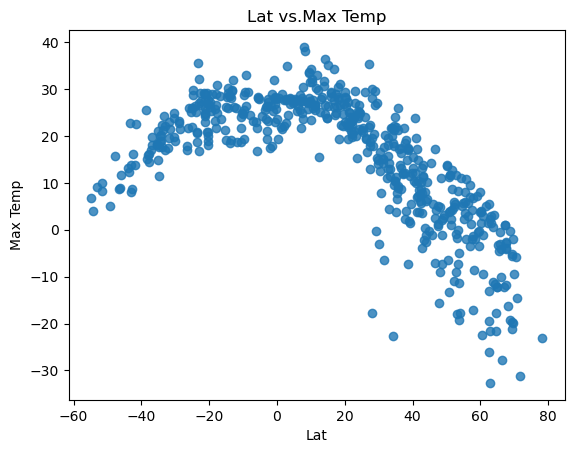

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           marker = "o",
           alpha=0.8,
           linewidths=1)

# Incorporate the other graph properties
plt.title("Lat vs.Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

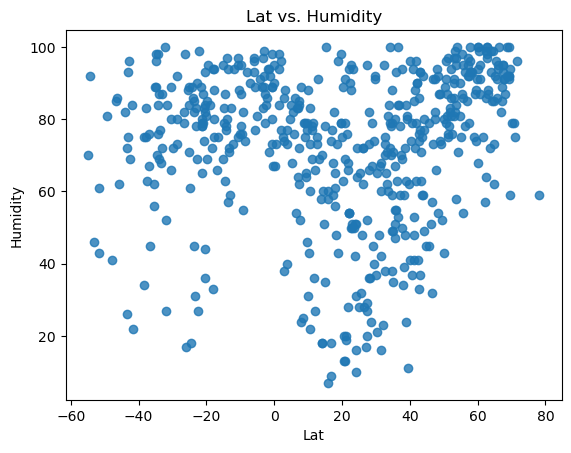

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
           marker="o",
           alpha=0.8,
           linewidths=1)

# Incorporate the other graph properties
plt.title("Lat vs. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

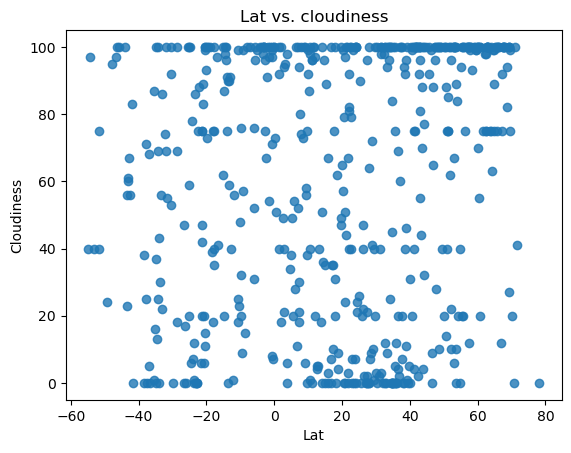

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],
           marker="o",
           alpha=0.8,
           linewidths=1)
           

# Incorporate the other graph properties
plt.title("Lat vs. cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

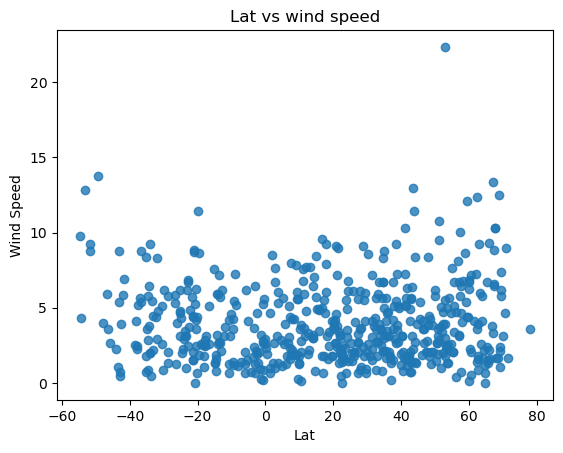

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],
           marker="o",
           alpha=0.8,
           linewidths=1)

# Incorporate the other graph properties
plt.title("Lat vs wind speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y,title,text_coordinates):
    (slope,intercept,r_value,p_value,std_err)=linregress(x,y)
    linregress_value = x*slope+intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, color = 'blue',label ='Data Points')
    plt.plot(x, linregress_value, color = 'red',label = 'Linear Regression ')
    plt.xlabel('x-axis label')
    plt.ylabel('y-axis label')
    plt.title('Linear Regression Plot')
    plt.legend()
    plt.show()
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df.loc[(city_data_df["Lat"] >=0)] 

# Display sample data
northern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,qaqortoq,60.7167,-46.0333,-9.38,87,20,0.51,GL,1710535971
5,albany,42.6001,-73.9662,8.75,76,100,2.08,US,1710535690
8,isafjordur,66.0755,-23.1240,-4.15,95,100,2.19,IS,1710535978
10,bikenibeu village,1.3673,173.1241,28.98,84,40,4.63,KI,1710535982
12,anahuac,27.2333,-100.1500,35.41,27,21,3.25,MX,1710535986


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.07,93,60,0.45,AU,1710535957
1,cabinda,-5.5500,12.2000,28.08,89,96,1.54,AO,1710535961
2,hwange,-18.3693,26.5019,23.23,72,39,2.55,ZW,1710535964
3,puerto natales,-51.7236,-72.4875,8.25,61,75,8.75,CL,1710535967
6,ushuaia,-54.8000,-68.3000,6.79,70,40,9.77,AR,1710535863


###  Temperature vs. Latitude Linear Regression Plot

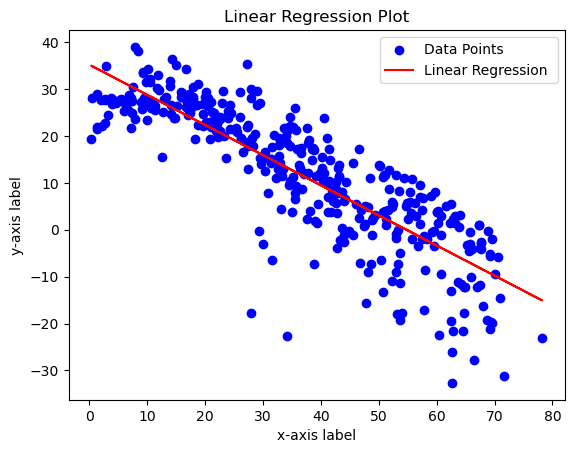

In [16]:
# Linear regression on Northern Hemisphere
x=northern_hemisphere_data["Lat"]
y=northern_hemisphere_data["Max Temp"]
plot_linear_regression(x,y,"Max Temp",(6,-10))                           


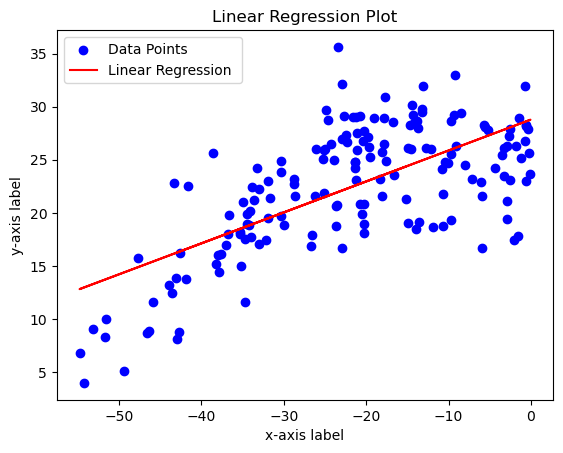

In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemisphere_data["Lat"]
y = southern_hemisphere_data["Max Temp"]
plot_linear_regression(x,y,"Max Temp",(6,-10))

For the northern hemisphere as the latitude increases the temperature reduces whreas in the southern hemisphere the temperature
increase as the latitude increases.

### Humidity vs. Latitude Linear Regression Plot

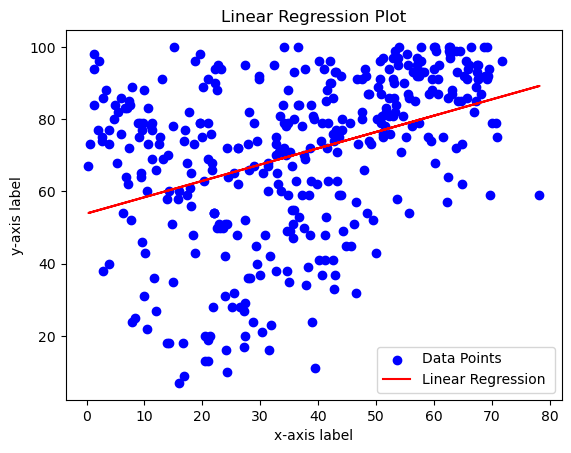

In [20]:
# Northern Hemisphere
x = northern_hemisphere_data["Lat"]
y = northern_hemisphere_data["Humidity"]
plot_linear_regression(x,y,"Humidity",(6,80))

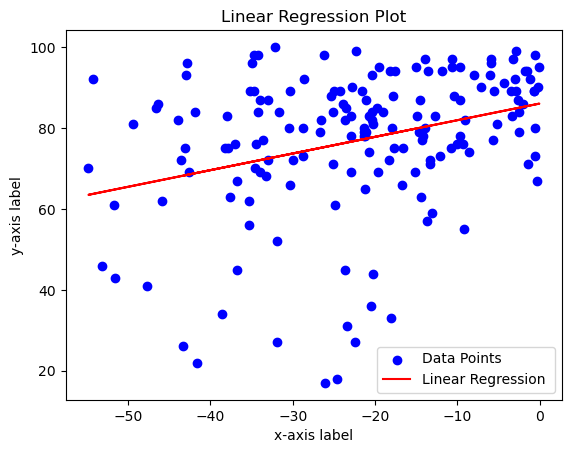

In [21]:
# Southern Hemisphere
x = southern_hemisphere_data["Lat"]
y = southern_hemisphere_data["Humidity"]
plot_linear_regression(x,y,"Humidity",(6,80))

For both the northern and the southern hemisphere as the latitude increases the humidity also increases.

### Cloudiness vs. Latitude Linear Regression Plot

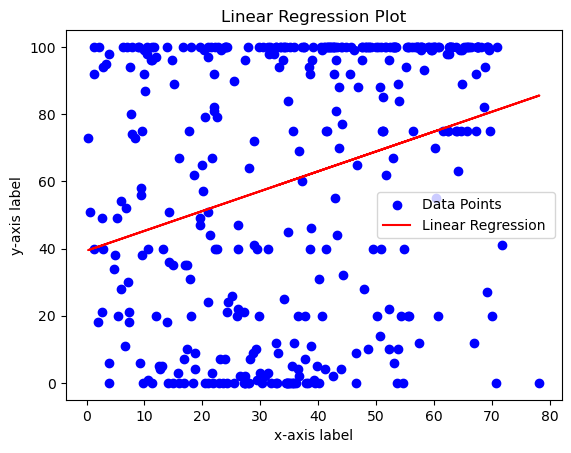

In [22]:
# Northern Hemisphere
x = northern_hemisphere_data["Lat"]
y = northern_hemisphere_data["Cloudiness"]
plot_linear_regression(x,y,"Cloudiness",(6,60))

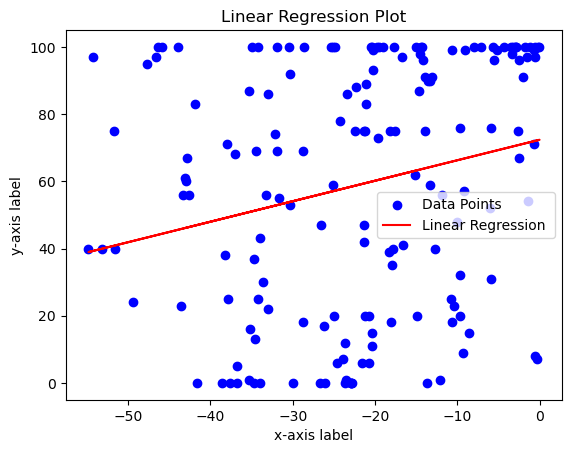

In [23]:
# Southern Hemisphere
x = southern_hemisphere_data["Lat"]
y = southern_hemisphere_data["Cloudiness"]
plot_linear_regression(x,y,"Cloudiness",(6,60))

The linear regression for both the northern hemisphere and the southern hemisphere shows the same, as the latitude increase the linear regression also increases.which indicates positive correllation for cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

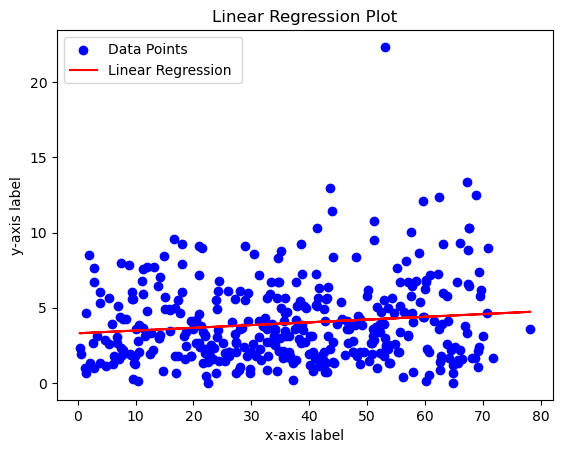

In [24]:
# Northern Hemisphere
x = northern_hemisphere_data["Lat"]
y = northern_hemisphere_data["Wind Speed"]
plot_linear_regression(x,y,"Wind Speed",(6,3))

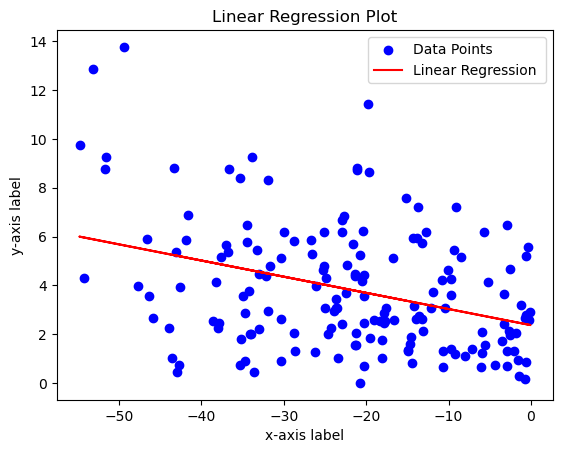

In [25]:
# Southern Hemisphere
x = southern_hemisphere_data["Lat"]
y = southern_hemisphere_data["Wind Speed"]
plot_linear_regression(x,y,"Wind Speed",(6,3))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The wind speed for thw Northern hemisphere is slightly constant,the variations in the wind speed is so small.
Whereas in the southern hemisphere the wind speed is reducing as the latitude is increasing the slope of the correllation is high. 
